In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import utilities as ut
import cv2
import pandas as pd
import numpy as np

dataset_paths = ut.images_paths("Images/WarpedCards/")
base_cards_paths = ut.images_paths("Images/Cards/")




In [3]:
def append_data(row):
    data=row["moments"].copy()
    data = np.append(data,row["hue"])
    return data

In [4]:
labels = []
hu_moments = []
average_hue=[]
samples=[]
for path in dataset_paths:
    samples.append(ut.label_properties(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_raw = pd.DataFrame(samples)
df_raw["moments"] = hu_moments
df_raw["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_raw)

    value seed label index                                            moments  \
0       3    B    3B    3B  [0.3145778278444345, 0.04647420141314236, 0.00...   
1       5    O     O     O  [0.15921942756458643, 1.754684232335188e-05, 1...   
2       7    C     C     C  [0.21473316566565082, 0.01305278626968452, 0.0...   
3       9    O     9     9  [0.24102847795029614, 0.014179606224553512, 0....   
4       A    B    AB    AB  [0.3695914816476922, 0.07985990933267999, 0.00...   
..    ...  ...   ...   ...                                                ...   
963     6    C     C     C  [0.23547967082239613, 0.02199832340820809, 0.0...   
964     9    S     9     9  [0.23515724939883592, 0.018640239649311413, 0....   
965     4    B     B     B  [0.3082161110638816, 0.06475832030863146, 0.00...   
966     3    C     C     C  [0.21142769938013894, 0.013308258037133845, 0....   
967     5    C     C     C  [0.22517432413584354, 0.019054102235682078, 0....   

           hue             

In [5]:
labels = []
hu_moments = []
samples=[]
average_hue=[]
for path in base_cards_paths:
    samples.append(ut.label_class_only(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_base = pd.DataFrame(samples)
df_base["moments"] = hu_moments
df_base["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_base)


   value seed label                                            moments  \
0      3    O     O  [0.15920006061932845, 1.0004776622748325e-05, ...   
1      9    S     9  [0.2327012009921153, 0.017428553068590077, 0.0...   
2      5    B     B  [0.3382004408691672, 0.08553809840674291, 0.00...   
3      7    S     7  [0.7296534270326875, 0.1525365272091704, 0.238...   
4      2    O     O  [0.15919299362630795, 9.419874811678207e-06, 1...   
5      4    O     4  [0.24825667613837687, 0.01543724752987511, 0.0...   
6      4    C     C  [0.2142792002949413, 0.014672966581150875, 0.0...   
7      R    O     R  [0.28223557568946117, 0.04646127391072247, 0.0...   
8      6    O     O  [0.15928087493471363, 7.556384104803091e-06, 2...   
9      7    O     O  [0.15926651534993982, 2.6276452213749426e-06, ...   
10     3    B    3B  [0.315491101969616, 0.04702488345740401, 0.003...   
11     9    O     9  [0.22911590428462808, 0.011509687235114169, 0....   
12     R    S     R  [0.26074346777962

In [6]:
filter = ['O','B','S','C']

df_raw_filtered= df_raw#[(df_raw['label'].isin(filter))]
df_base_filtered= df_base#[df_base['label'].isin(filter)]
print(df_raw_filtered)

    value seed label index                                            moments  \
0       3    B    3B    3B  [0.3145778278444345, 0.04647420141314236, 0.00...   
1       5    O     O     O  [0.15921942756458643, 1.754684232335188e-05, 1...   
2       7    C     C     C  [0.21473316566565082, 0.01305278626968452, 0.0...   
3       9    O     9     9  [0.24102847795029614, 0.014179606224553512, 0....   
4       A    B    AB    AB  [0.3695914816476922, 0.07985990933267999, 0.00...   
..    ...  ...   ...   ...                                                ...   
963     6    C     C     C  [0.23547967082239613, 0.02199832340820809, 0.0...   
964     9    S     9     9  [0.23515724939883592, 0.018640239649311413, 0....   
965     4    B     B     B  [0.3082161110638816, 0.06475832030863146, 0.00...   
966     3    C     C     C  [0.21142769938013894, 0.013308258037133845, 0....   
967     5    C     C     C  [0.22517432413584354, 0.019054102235682078, 0....   

           hue             

In [12]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df_raw_filtered["data"].tolist())
Scaled_data=scaling.transform(df_raw_filtered["data"].tolist())
#principal=PCA(n_components=7)
#principal.fit(Scaled_data)
#x=principal.transform(Scaled_data)
x=Scaled_data
print(x.shape)

(968, 8)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,df_raw_filtered["label"].tolist(), test_size=0.2, random_state=42)
"""X_test = x
X_train = scaling.transform(df_base_filtered["data"].to_list())
y_test = df_raw_filtered["label"].tolist()
y_train = df_base_filtered["label"].tolist()"""


'X_test = x\nX_train = scaling.transform(df_base_filtered["data"].to_list())\ny_test = df_raw_filtered["label"].tolist()\ny_train = df_base_filtered["label"].tolist()'

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'kernel': ['rbf', 'poly', 'sigmoid'] # Specifies the kernel type to be used in the algorithm
}
grid_svm = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_svm.fit(X_train, y_train)
f_clf = RandomForestClassifier(n_estimators=10)
f_clf = f_clf.fit(X_train,y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best Estimator:", grid_svm.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

In [15]:
test_image = cv2.imread('Images/WarpedCards/6B-B-1.jpg')
image = cv2.imread(path)
binary_image,contours = ut.preprocess_image(test_image)
hue = ut.average_hue_of_contours(test_image, [contours[0]])
moments = cv2.moments(contours[0])
hu_moments_test= cv2.HuMoments(moments).flatten()
data = hu_moments_test.copy()
data = np.append(data,hue)
print(data)
hu_moments_test=scaling.transform(data.reshape(1, -1))

print(f_clf.predict(hu_moments_test))

[3.22470393e-01 7.55135175e-02 3.88654488e-03 2.23940109e-03
 6.60662312e-06 6.15379680e-04 5.26065371e-09 6.14008539e+01]
['B']


In [16]:

#predictions = grid_svm.predict(X_test)
predictions = f_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9948453608247423
Classification Report:
              precision    recall  f1-score   support

          2B       1.00      1.00      1.00         7
          2C       1.00      1.00      1.00         5
          2S       1.00      1.00      1.00         6
          3B       1.00      1.00      1.00         4
          3S       1.00      1.00      1.00         5
          4O       1.00      1.00      1.00         8
          4S       1.00      1.00      1.00         7
          5S       1.00      1.00      1.00         2
          7S       1.00      1.00      1.00         6
           8       0.94      1.00      0.97        17
           9       1.00      1.00      1.00        19
          AB       1.00      1.00      1.00         3
          AC       1.00      1.00      1.00         8
          AO       1.00      1.00      1.00         5
          AS       1.00      1.00      1.00         6
           B       1.00      0.96      0.98        24
           C       1.00      

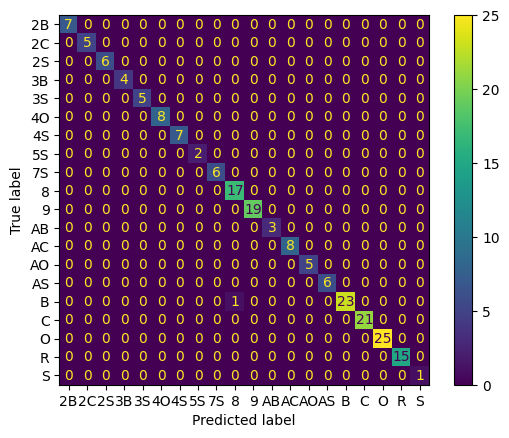

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=grid_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=grid_svm.classes_)
disp.plot()

In [ ]:
df_raw.to_csv("workingDirectory/pollo.csv")